<a href="https://colab.research.google.com/github/Nurus786/OIBSIP_INTERNSHIP/blob/main/oasis_internship_DataAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT-4   LEVEL 1

SENTIMENT ANALYSIS

In [15]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/sentiment Datasets/Twitter_Data.csv")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Basic information about the dataset
print("columns in DataFrame:")
print(df.columns.tolist())
print("\nshape of Dataframe:")
print(df.shape)
print("\nsample Data:")
print(df.head())

columns in DataFrame:
['clean_text', 'category']

shape of Dataframe:
(162980, 2)

sample Data:
                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [ ]:
#Data Preprocessing
#check for missing values
print("\nMissing values in each column:")
print(df.isna().sum())

# Drop rows with missing values in 'clean_text' or 'category'
df.dropna(subset=['clean_text','category',], inplace=True)

df['category'] = df['category'].astype(str)


Missing values in each column:
clean_text    4
category      7
dtype: int64


In [11]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Make sure to download necessary NLTK data files if not already done
nltk.download('punkt')
nltk.download('stopwords')

# Text preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return ''  # Return empty string for non-string input
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if not word in stop_words and word.isalpha()]
    return ' '.join(filtered_tokens)  # Join tokens with a space

# Example DataFrame creation (if not already created)
# df = pd.read_csv('your_file.csv')  # Replace with actual file or DataFrame initialization

# Check if 'clean_text' exists and has no missing values
if 'clean_text' in df.columns and 'category' in df.columns:
    df['clean_text'] = df['clean_text'].fillna('')  # Fill NaNs with empty strings

    # Handle missing values in the target column (remove or impute)
    df = df.dropna(subset=['category'])  # Remove rows where 'category' is NaN

    # Apply preprocessing to the 'clean_text' column
    df['clean_text'] = df['clean_text'].apply(preprocess_text)

    # Prepare features and target
    X = df['clean_text']
    Y = df['category']

    # Vectorize the text data
    vectorizer = CountVectorizer()
    X_vectorized = vectorizer.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, Y, test_size=0.2, random_state=42)

    # Initialize and train the Multinomial Naive Bayes model
    model = MultinomialNB()
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
else:
    print("Columns 'clean_text' and 'category' do not exist in DataFrame.")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 72.93%


In [14]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)



Classification Report:
              precision    recall  f1-score   support

        -1.0       0.71      0.61      0.66      7230
         0.0       0.87      0.61      0.71     10961
         1.0       0.68      0.88      0.77     14404

    accuracy                           0.73     32595
   macro avg       0.75      0.70      0.71     32595
weighted avg       0.75      0.73      0.72     32595


Confusion Matrix:
[[ 4421   424  2385]
 [  673  6652  3636]
 [ 1109   597 12698]]


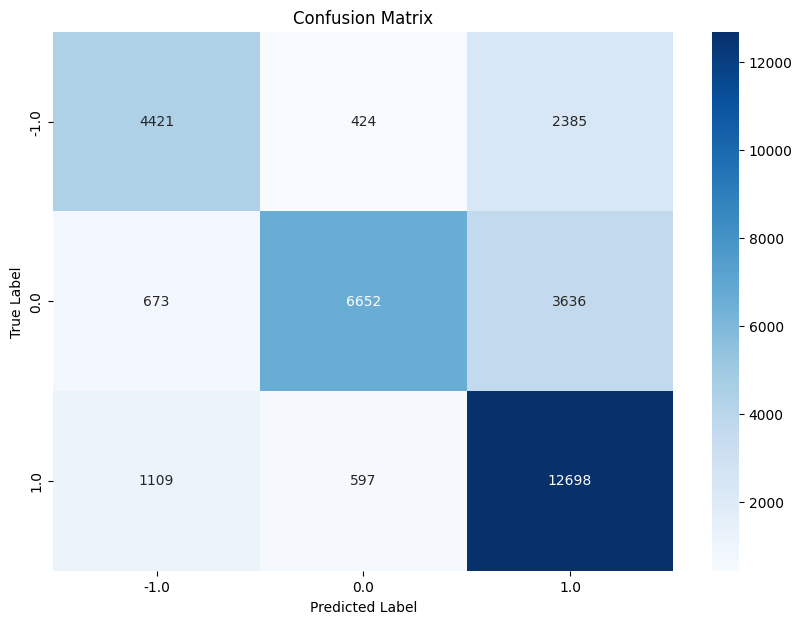

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [19]:
# Example of using the model for new prediction
def predict_sentiment(text):
  text_processed = preprocess_text(text)
  text_vectorized = vectorizer.transform([text_processed])
  prediction = model.predict(text_vectorized)
  return prediction[0]

In [20]:
# Example usage
example_text = "I love the new features in this app!"
print(f"\nsentiment prediction for '{example_text}': {predict_sentiment(example_text)}")

print("Sentiment Analysis Complete.")


sentiment prediction for 'I love the new features in this app!': 1.0
Sentiment Analysis Complete.
